In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
#Importando a base
base= pd.read_csv('Mall_Customers_no_CustomersID.csv')
base.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [3]:
#Realizando o pre processamento.
preprocessing=ColumnTransformer(
    [
        ('standart',StandardScaler(),['Age','Annual Income (k$)','Spending Score (1-100)']),
        ('onehot',OneHotEncoder(),['Gender'])
    ]
)
preprocessing.fit_transform(base)
base_scaled=pd.DataFrame(preprocessing.fit_transform(base),
                        columns=preprocessing.get_feature_names_out(),
                        )
base_scaled.head(3)

,standart__Age,standart__Annual Income (k$),standart__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0


In [4]:
preprocessing

ColumnTransformer(transformers=[('standart', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('onehot', OneHotEncoder(), ['Gender'])])

In [5]:
#Guardando a base pre processada.
base_scaled.to_csv('Mall_Customers_scaled',index=False)

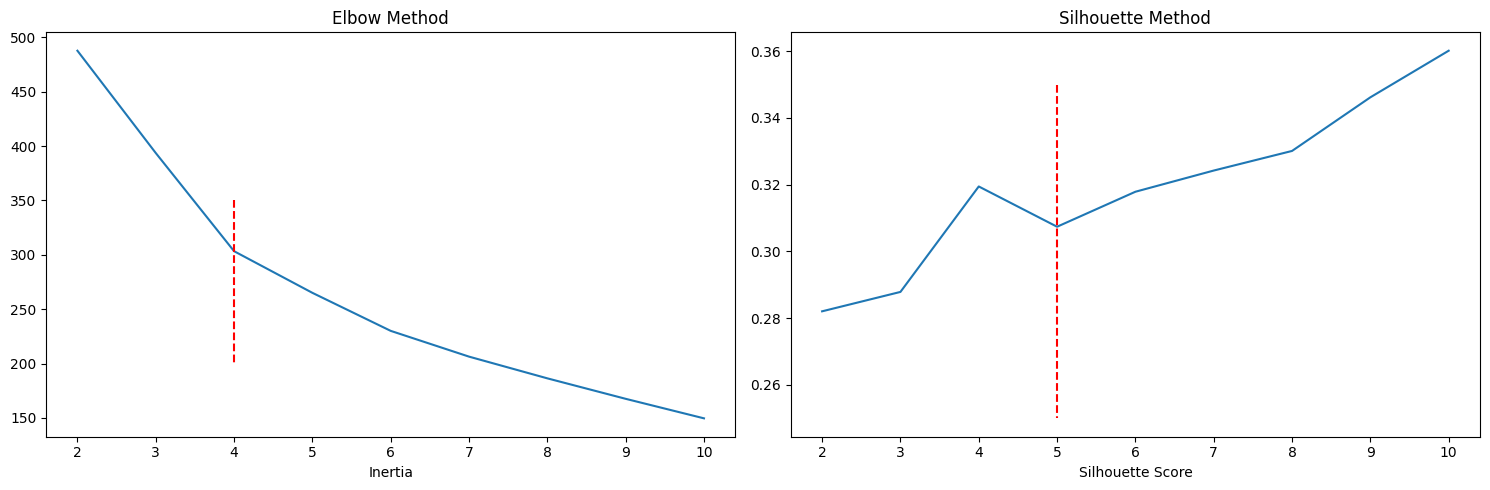

In [6]:
#Importando o grafico para auxiliar na função para Kmeans
from Funcoes_auxiliares import graficos_elbow_silhouette
graficos_elbow_silhouette(base_scaled)

In [7]:
#Realizando o processo de Pipeline
pipeline=Pipeline(
    [
        ('Preprocessing',preprocessing),
        ('Clustering',KMeans(n_clusters=4,random_state=42, n_init=10))
    ]
)
pipeline.fit(base)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('standart', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('Clustering',
                 KMeans(n_clusters=4, n_init=10, random_state=42))])

In [8]:
#Guardando dados
import joblib
joblib.dump(pipeline,'pipeline_preprocessing.pkl')

['pipeline_preprocessing.pkl']

In [9]:
#Visualiação das etapas
pipeline.named_steps

{'Preprocessing': ColumnTransformer(transformers=[('standart', StandardScaler(),
                                  ['Age', 'Annual Income (k$)',
                                   'Spending Score (1-100)']),
                                 ('onehot', OneHotEncoder(), ['Gender'])]),
 'Clustering': KMeans(n_clusters=4, n_init=10, random_state=42)}

In [10]:
#Verificação dos cluster
pipeline['Clustering'].labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [11]:
#Criar o Dataframe com cluster.
base_clustered=base.copy()
base_clustered['cluster']=pipeline['Clustering'].labels_

In [12]:
base_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


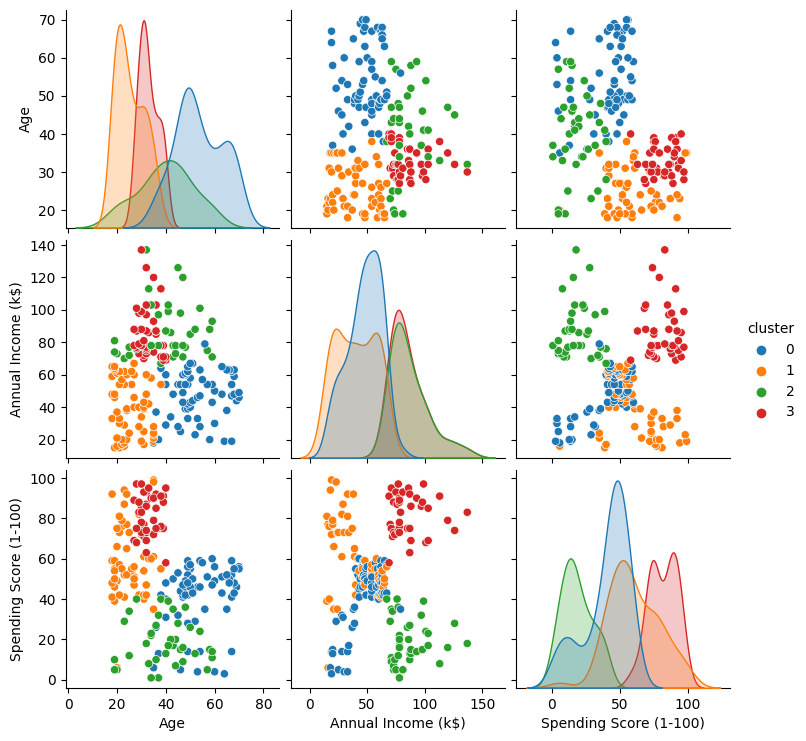

In [13]:
#Visualizando os graficos para encontrar os clusters.
sns.pairplot(base_clustered,diag_kind='kde',hue='cluster',palette='tab10');

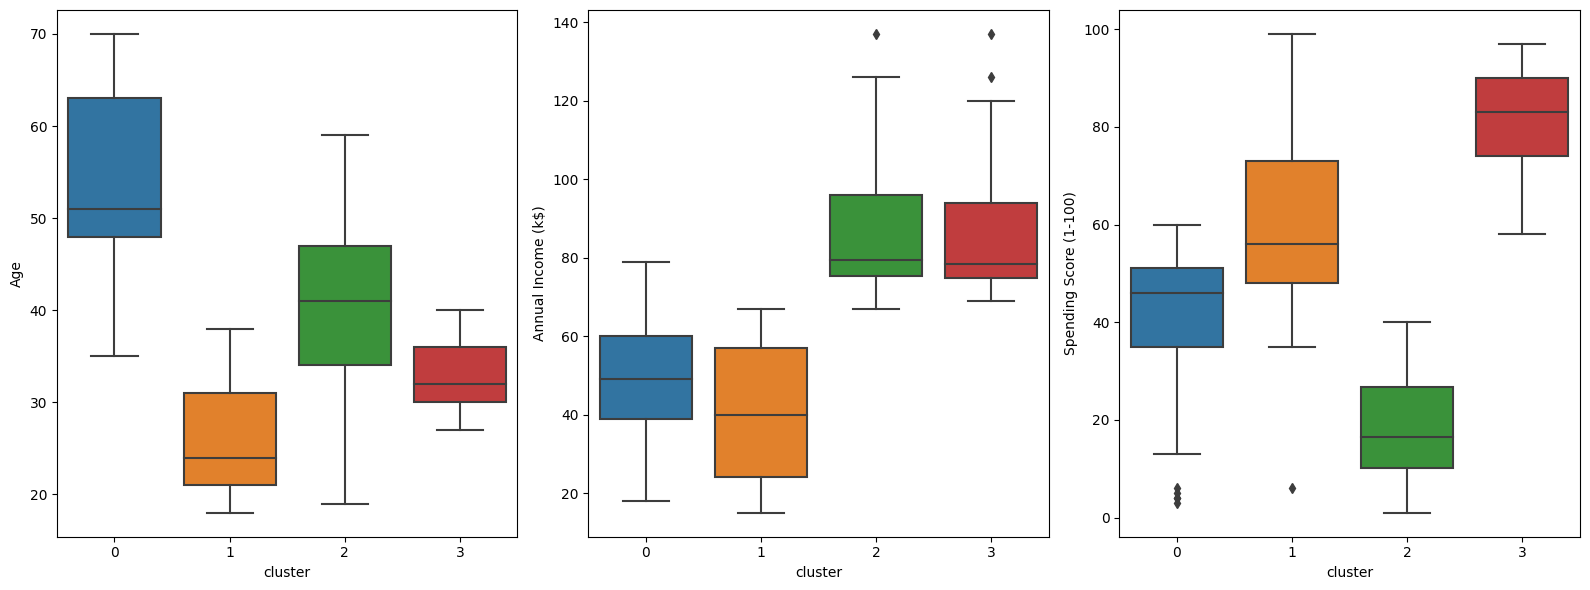

In [14]:
#Plotando os Clusters
fig, axs = plt.subplots(ncols= 3,figsize=(16,6),tight_layout=True)
for ax, col in zip(axs,base_clustered.select_dtypes('number')):
    sns.boxplot(data=base_clustered,x="cluster",y=col, ax=ax)
plt.show()

#### Observações:
- Cluster 0 são de pessoas mais velhas, com salários intermedarios e pontuação intermediarios.
- Cluster 1 são de pessoas mais novas e com salários intermediarios e maiores pontuações
- Cluster 2 são de pessoas mais ricas e com pontuações menores.
- Cluster 3 são de pessoas de idade moderada, salarios altos, pontuações altas

Pontuação de gastos | Renda | Idade | Número Cluster
--- | --- | --- | ---
Alta | Alta | Moderado | 3 
Baixo | Alto | Moderado | 2 
Alta | Moderado | Jovem | 1
Moderado | Moderado | Alta | 0

In [15]:
#Verificando a quatidade de pontos por cluster
base_clustered['cluster'].value_counts().sort_index()

cluster
0    65
1    57
2    38
3    40
Name: count, dtype: int64

In [16]:
#Verificando cluster por genero
base_clustered.groupby(['cluster','Gender']).size()

cluster  Gender
0        Female    38
         Male      27
1        Female    34
         Male      23
2        Female    18
         Male      20
3        Female    22
         Male      18
dtype: int64

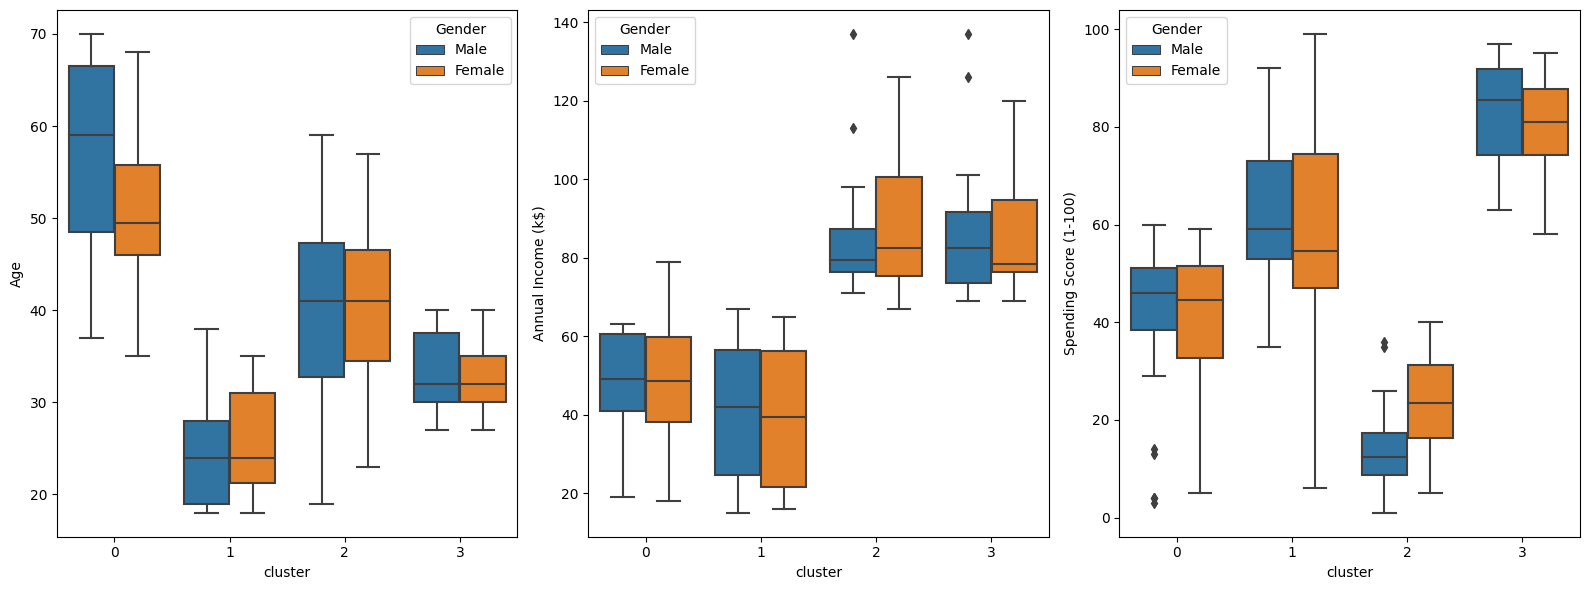

In [17]:
#Visualizando os Clusters por genero
fig, axs = plt.subplots(ncols= 3,figsize=(16,6),tight_layout=True)
for ax, col in zip(axs,base_clustered.select_dtypes('number')):
    sns.boxplot(data=base_clustered,x="cluster",y=col, ax=ax,hue='Gender')
plt.show()

In [18]:
#Recordando os nomes das colunas
pipeline['Preprocessing'].get_feature_names_out()

array(['standart__Age', 'standart__Annual Income (k$)',
       'standart__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [19]:
#Verificando os clusters centrais
pipeline['Clustering'].cluster_centers_

array([[ 1.06297508, -0.4946758 , -0.37865953,  0.58461538,  0.41538462],
       [-0.96249203, -0.78476346,  0.39202966,  0.59649123,  0.40350877],
       [ 0.0768659 ,  0.9971462 , -1.22042727,  0.47368421,  0.52631579],
       [-0.42880597,  0.97484722,  1.21608539,  0.55      ,  0.45      ]])

In [20]:
#Excluindo os Arrays envolvendo genero para termos o gráfico tridimensinal
centroides = pipeline['Clustering'].cluster_centers_[:, :-2]
centroides

array([[ 1.06297508, -0.4946758 , -0.37865953],
       [-0.96249203, -0.78476346,  0.39202966],
       [ 0.0768659 ,  0.9971462 , -1.22042727],
       [-0.42880597,  0.97484722,  1.21608539]])

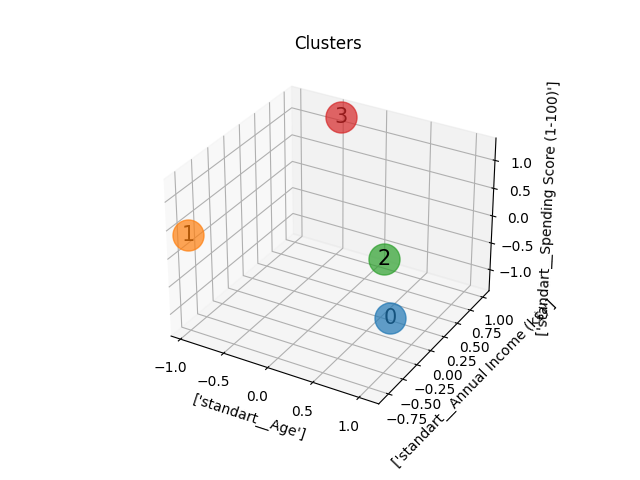

In [21]:
%matplotlib ipympl
from Funcoes_auxiliares import visualizar_cluster
visualizar_cluster(
    dataframe=base_scaled, 
    colunas=pipeline['Preprocessing'].get_feature_names_out()[:-2],
    quantidade_cores=5,
    centroids=centroides
)